In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip uninstall tensorflow

Uninstalling tensorflow-2.3.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.3.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.3.0


In [4]:
pip install tensorflow==2.1.0

     |████████████████████████████████| 421.8MB 39kB/s 
     |████████████████████████████████| 51kB 6.5MB/s 
     |████████████████████████████████| 450kB 36.8MB/s 
     |████████████████████████████████| 3.9MB 34.3MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=6ebb94150d0bc84a5bc8a130217d9a5d5a6a0d22ce3b06a42b149df51668a45e
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninsta

In [5]:
import tensorflow as tf

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import SeparableConv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

class FireDetectionNet:
	@staticmethod
	def build(width, height, depth, classes):
		# initialize the model along with the input shape to be
		# "channels last" and the channels dimension itself
		model = Sequential()
		inputShape = (height, width, depth)
		chanDim = -1

		# CONV => RELU => POOL
		model.add(SeparableConv2D(8, (7, 7), padding="same",
			input_shape=inputShape))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))
  
  # CONV => RELU => POOL
		model.add(SeparableConv2D(16, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))

		# (CONV => RELU) * 2 => POOL
		model.add(SeparableConv2D(32, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(SeparableConv2D(64, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(SeparableConv2D(96, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))


		model.add(SeparableConv2D(128, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		# first set of FC => RELU layers
		model.add(Flatten())
		model.add(Dense(128))                                      
		model.add(Activation("relu"))
		model.add(BatchNormalization())
		model.add(Dropout(0.5))

		# second set of FC => RELU layers
		model.add(Dense(128))
		model.add(Activation("relu"))
		model.add(BatchNormalization())
		model.add(Dropout(0.5))
	
		# softmax classifier
		model.add(Dense(classes))
		model.add(Activation("softmax"))
		print("completed")

		# return the constructed network architecture
		return model

In [7]:
Normal_Path = '/content/drive/My Drive/Noermal'
Anomaly_Path = '/content/drive/My Drive/Panicked'

In [23]:
# initialize the class labels in the dataset
CLASSES = ["Normal", "Suspicious"]

# define the size of the training and testing split
TRAIN_SPLIT = 0.80
TEST_SPLIT = 0.20

# define the initial learning rate, batch size, and number of epochs
INIT_LR = 0.01
BATCH_SIZE = 64
NUM_EPOCHS = 50
SAMPLE_SIZE = 50

In [9]:
import matplotlib                   # PLOTTING LIBRARY
matplotlib.use("Agg")               # AGG renders the plots at the backend
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Generate batches of tensor image data with real-time data augmentation.
from tensorflow.keras.optimizers import SGD  # Stochastic Gradient Descent Optimizer
from tensorflow.keras.utils import to_categorical # Conversion into Binary Class Matrices
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import sys

def load_dataset(datasetPath):
	# grab the paths to all images in our dataset directory, then
	# initialize our lists of images
	imagePaths = list(paths.list_images(datasetPath))
	data = []

	# loop over the image paths
	for imagePath in imagePaths:
		# load the image and resize it to be a fixed 128x128 pixels,
		# ignoring aspect ratio
		image = cv2.imread(imagePath)
		image = cv2.resize(image, (128, 128))

		# add the image to the data lists
		data.append(image)
  # return the data list as a NumPy array
	return np.array(data, dtype="float32")
# load the fire and non-fire images
print("[INFO] loading data...")
normalData = load_dataset( Normal_Path)
print("[INFO] Normal set is loaded")
suspiciousData = load_dataset( Anomaly_Path)
print("[INFO] Suspicious set is loaded")
print("[INFO] Completed")

[INFO] loading data...
[INFO] Normal set is loaded
[INFO] Suspicious set is loaded
[INFO] Completed


In [10]:
print(normalData.shape)
print(suspiciousData.shape)

(83, 128, 128, 3)
(92, 128, 128, 3)


In [11]:
normalLabels = np.ones((normalData.shape[0],))
suspiciousLabels = np.zeros((suspiciousData.shape[0],))
# stack the fire data with the non-fire data, then scale the data
# to the range [0, 1]
data = np.vstack([normalData, suspiciousData])
labels = np.hstack([normalLabels, suspiciousLabels])

In [12]:
data = data/255
# perform one-hot encoding on the labels and account for skew in the
# labeled data
labels = to_categorical(labels, num_classes=2)
classTotals = labels.sum(axis=0)
classWeight = classTotals.max() / classTotals

In [13]:
print(data.shape)
print(labels.shape)
print(classTotals)

(175, 128, 128, 3)
(175, 2)
[92. 83.]


In [14]:
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size= TEST_SPLIT, random_state=42)

In [15]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(140, 128, 128, 3)
(140, 2)
(35, 128, 128, 3)
(35, 2)


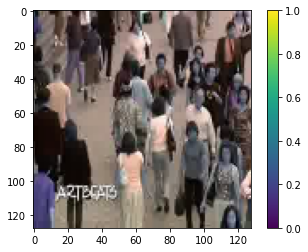

In [16]:
%matplotlib inline
plt.figure()
plt.imshow(trainX[14])
plt.colorbar()
plt.grid(False)
plt.show()

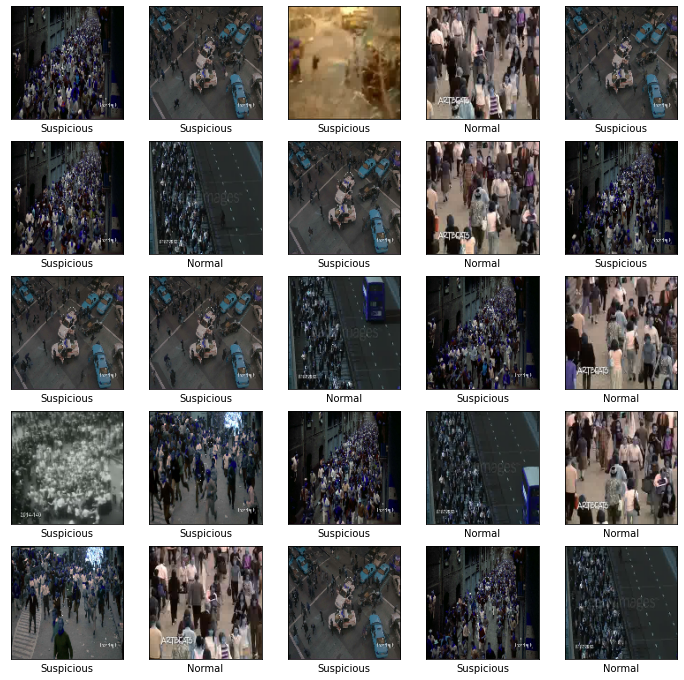

In [18]:
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    if trainY[i][0] == 1:
      plt.xlabel("Suspicious")
    else:
      plt.xlabel("Normal")

plt.show()

In [24]:
aug = ImageDataGenerator(
	rotation_range=30,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

# initialize the optimizer and model
print("[INFO] compiling model...")
opt = SGD(lr= INIT_LR, momentum=0.9,
	decay= INIT_LR /  NUM_EPOCHS)
model = FireDetectionNet.build(width=128, height=128, depth=3,
	classes=2)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

# check to see if we are attempting to find an optimal learning rate
# before training for the full number of epochs

# train the network
print("[INFO] training network...")
H = model.fit_generator(
	aug.flow(trainX, trainY, batch_size= BATCH_SIZE),
	validation_data=(testX, testY),
	steps_per_epoch=trainX.shape[0] //  BATCH_SIZE,
	epochs= NUM_EPOCHS,
	class_weight=classWeight,
	verbose=1)

# evaluate the network and show a classification report
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size= BATCH_SIZE)
print(classification_report(testY.argmax(axis=1),
predictions.argmax(axis=1), target_names= CLASSES))

# serialize the model to disk
#print("[INFO] serializing network to '{}'...".format( MODEL_PATH))
#model.save( MODEL_PATH)

[INFO] compiling model...
completed
[INFO] training network...
  ...
    to  
  ['...']
Train for 2 steps, validate on 35 samples
Epoch 1/50
2/2 [==============================] - 8s 4s/step - loss: 1.2725 - accuracy: 0.5547 - val_loss: 0.6960 - val_accuracy: 0.4286
Epoch 2/50
2/2 [==============================] - 4s 2s/step - loss: 1.0064 - accuracy: 0.6842 - val_loss: 0.7055 - val_accuracy: 0.4286
Epoch 3/50
2/2 [==============================] - 6s 3s/step - loss: 1.2717 - accuracy: 0.5703 - val_loss: 0.7035 - val_accuracy: 0.4286
Epoch 4/50
2/2 [==============================] - 4s 2s/step - loss: 0.7353 - accuracy: 0.6842 - val_loss: 0.5334 - val_accuracy: 0.5714
Epoch 5/50
2/2 [==============================] - 6s 3s/step - loss: 0.5797 - accuracy: 0.8359 - val_loss: 1.8182 - val_accuracy: 0.5714
Epoch 6/50
2/2 [==============================] - 4s 2s/step - loss: 0.5212 - accuracy: 0.8289 - val_loss: 4.2410 - val_accuracy: 0.5714
Epoch 7/50
2/2 [==============================] 

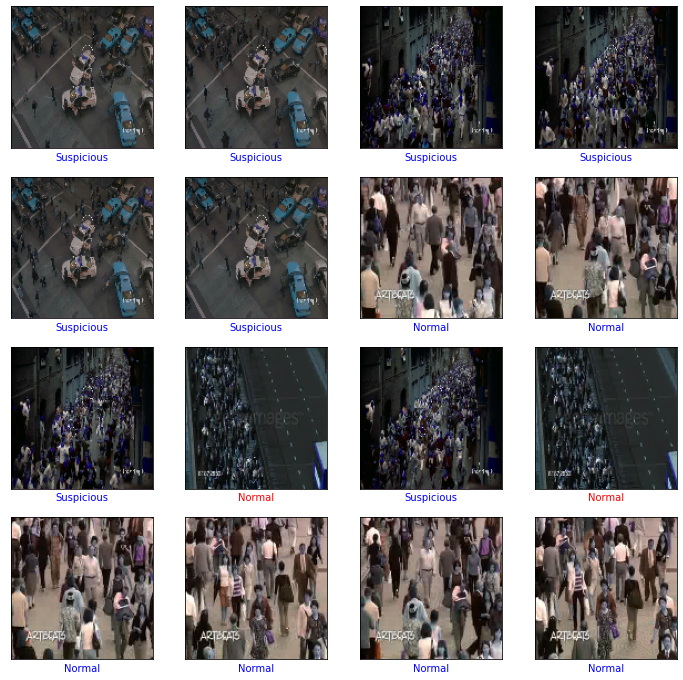

In [25]:
plt.figure(figsize=(12,12))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(testX[i], cmap=plt.cm.binary)
    if testY[i][0] == 1:
      if predictions[i][0] > 0.5:
        plt.xlabel("Suspicious", color='blue')
      else:
        plt.xlabel("Suspicious", color='red')
    else:
      if predictions[i][1] > 0.5:
        plt.xlabel("Normal", color='blue')
      else:
        plt.xlabel("Normal", color='red')

plt.show()

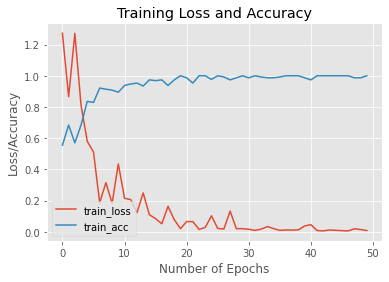

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

N = np.arange(0,  NUM_EPOCHS)
plt.style.use("ggplot")
fig = plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")